# Project: Exploring the Relationships Between GDP and Other Economic Parameters

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will be exploring the relationships between GDP and Population Growth, Life Expectancy and Fertility Rate, especially as these parameters extend across time periods and different countries. My datasets were obtained from gapminder.org as I selected the 'Gapminder World' dataset to investigate. The investigation led me to merge the GDP dataset with that of the other parameters to draw conclusions.
>
> For my exploratory ananlysis, I attempted to find out if a change in population affects GDP, the impact of GDP on life expectancy, as well as exploring if fertility rate has any relationship with GDP in the early 21st Century

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [48]:
# GDP dataset loaded

gdp_df = pd.read_csv('gdp_adjusted.csv')
gdp_df.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k



### Data Cleaning - GDP Data: Inspecting, Cleaning and Preparing GDP Data Frame for Merging with Other Data Frames

> The GDP dataset contains GDP estimates of countries from 1800 till date. It however has its entries in string format and also use 'k' to represent '1000'. Hence format change and cleaning will follow:


In [49]:
# I set the index to the coutry column. I'll be merging on this index. 

gdp_df.set_index('country', inplace=True)

In [57]:
# slicing for 1990 to 2000 to get the useful data we are working with

gdpuse_df = gdp_df.iloc[:, 190:201]
gdpuse_df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
country,,,,,,,,,,,
Afghanistan,1120,1020,981,672,498,736,698,663,634,603,584
Angola,1610,1670,1620,1260,1300,1530,1780,1960,2110,2210,2340
Albania,4830,3500,3270,3600,3920,4470,4910,4400,4820,5480,5890
Andorra,32.2k,31.7k,30.8k,29.4k,29.3k,29.6k,30.8k,33.7k,34.9k,36.2k,35.8k
United Arab Emirates,51.3k,50.5k,50.5k,50.1k,53.1k,56.2k,58.6k,62.8k,62.8k,64.6k,71.6k


In [58]:
gdpuse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    195 non-null    object
 1   1991    195 non-null    object
 2   1992    195 non-null    object
 3   1993    195 non-null    object
 4   1994    195 non-null    object
 5   1995    195 non-null    object
 6   1996    195 non-null    object
 7   1997    195 non-null    object
 8   1998    195 non-null    object
 9   1999    195 non-null    object
 10  2000    195 non-null    object
dtypes: object(11)
memory usage: 18.3+ KB


In [61]:
gdpuse_df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
count,195,195,195,195,195,195,195,195,195,195,195
unique,176,172,174,173,167,176,181,186,181,183,185
top,1120,30.8k,11.3k,12.6k,1650,13.3k,11.3k,10.1k,2360,8510,14.5k
freq,3,3,2,5,4,4,4,2,3,2,2


In [77]:
gdpuse_df.duplicated().sum()

0

In [90]:
# Renaming the useful GDP data by adding suffixes to column names so data can be identified after merging

gdpuse_df = gdpuse_df.rename(columns = lambda x: x[:4] + "_gdp")
gdpuse_df.head(3)

,1990_gdp,1991_gdp,1992_gdp,1993_gdp,1994_gdp,1995_gdp,1996_gdp,1997_gdp,1998_gdp,1999_gdp,2000_gdp
country,,,,,,,,,,,
Afghanistan,1120,1020,981,672,498,736,698,663,634,603,584
Angola,1610,1670,1620,1260,1300,1530,1780,1960,2110,2210,2340
Albania,4830,3500,3270,3600,3920,4470,4910,4400,4820,5480,5890



### Loading and Data Cleaning - Population Data: Inspecting, Cleaning and Preparing Population Data Frame for Merging with GDP Data Frame

> The Population dataset contains Population estimates of countries from 1800 till date. It however has its entries in string format and also use 'k'and 'M' to represent '1000' and '1,000,000' respectively. Hence format change and cleaning will follow:

In [834]:
# Population dataset loaded 

pop_df = pd.read_csv('population_total.csv')
pop_df.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M


In [835]:
# index set to country

pop_df.set_index('country', inplace=True)

In [836]:
# slicing for the useful population data

popuse_df = pop_df.iloc[:,190:201]
popuse_df.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
country,,,,,,,,,,,
Afghanistan,12.4M,13.3M,14.5M,15.8M,17.1M,18.1M,18.9M,19.4M,19.7M,20.2M,20.8M
Angola,11.8M,12.2M,12.7M,13.1M,13.5M,13.9M,14.4M,14.9M,15.4M,15.9M,16.4M
Albania,3.29M,3.28M,3.25M,3.2M,3.15M,3.11M,3.1M,3.1M,3.11M,3.12M,3.13M


In [72]:
# info shows all sting entries. Formatting will follow

popuse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    197 non-null    object
 1   1991    197 non-null    object
 2   1992    197 non-null    object
 3   1993    197 non-null    object
 4   1994    197 non-null    object
 5   1995    197 non-null    object
 6   1996    197 non-null    object
 7   1997    197 non-null    object
 8   1998    197 non-null    object
 9   1999    197 non-null    object
 10  2000    197 non-null    object
dtypes: object(11)
memory usage: 18.5+ KB


In [73]:
popuse_df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
count,197,197,197,197,197,197,197,197,197,197,197
unique,188,188,187,190,188,184,187,181,185,177,186
top,10.2M,13.3M,10.4M,619k,30.4k,3.22M,22.1M,10.2M,11M,8.05M,11.1M
freq,3,2,3,2,2,3,2,3,3,4,3


In [76]:
popuse_df.duplicated().sum()

0

In [145]:
# suffixes added to columns

popuse_df = popuse_df.rename(columns = lambda x: x[:4] + "_pop")
popuse_df.head(3)

,1990_pop,1991_pop,1992_pop,1993_pop,1994_pop,1995_pop,1996_pop,1997_pop,1998_pop,1999_pop,2000_pop
country,,,,,,,,,,,
Afghanistan,12.4M,13.3M,14.5M,15.8M,17.1M,18.1M,18.9M,19.4M,19.7M,20.2M,20.8M
Angola,11.8M,12.2M,12.7M,13.1M,13.5M,13.9M,14.4M,14.9M,15.4M,15.9M,16.4M
Albania,3.29M,3.28M,3.25M,3.2M,3.15M,3.11M,3.1M,3.1M,3.11M,3.12M,3.13M


In [177]:
# merging useful GDP and Population data frames

gdp_pop_df = pd.merge(gdpuse_df, popuse_df, on = 'country')
gdp_pop_df.head(3)

,1990_gdp,1991_gdp,1992_gdp,1993_gdp,1994_gdp,1995_gdp,1996_gdp,1997_gdp,1998_gdp,1999_gdp,...,1991_pop,1992_pop,1993_pop,1994_pop,1995_pop,1996_pop,1997_pop,1998_pop,1999_pop,2000_pop
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1120,1020,981,672,498,736,698,663,634,603,...,13.3M,14.5M,15.8M,17.1M,18.1M,18.9M,19.4M,19.7M,20.2M,20.8M
Angola,1610,1670,1620,1260,1300,1530,1780,1960,2110,2210,...,12.2M,12.7M,13.1M,13.5M,13.9M,14.4M,14.9M,15.4M,15.9M,16.4M
Albania,4830,3500,3270,3600,3920,4470,4910,4400,4820,5480,...,3.28M,3.25M,3.2M,3.15M,3.11M,3.1M,3.1M,3.11M,3.12M,3.13M


In [178]:
# narrowing our focus to years 1990 and 2000 entries

focus_gdpop_df = gdp_pop_df.iloc[:,[0,10,11,21]]
focus_gdpop_df.head()

,1990_gdp,2000_gdp,1990_pop,2000_pop
country,,,,
Afghanistan,1120,584,12.4M,20.8M
Angola,1610,2340,11.8M,16.4M
Albania,4830,5890,3.29M,3.13M
Andorra,32.2k,35.8k,54.5k,65.4k
United Arab Emirates,51.3k,71.6k,1.83M,3.13M


> Replacing k's and M's and changing data type:

In [179]:
focus_gdpop_df['1990_gdp']=focus_gdpop_df.iloc[:,0].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

C:\Users\IKENNA\AppData\Local\Temp\ipykernel_6424\650038971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_gdpop_df['1990_gdp']=focus_gdpop_df.iloc[:,0].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)


In [180]:
focus_gdpop_df['2000_gdp']=focus_gdpop_df.iloc[:,1].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

C:\Users\IKENNA\AppData\Local\Temp\ipykernel_6424\2377257121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_gdpop_df['2000_gdp']=focus_gdpop_df.iloc[:,1].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)


In [181]:
focus_gdpop_df['1990_pop']=focus_gdpop_df.iloc[:,2].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)

C:\Users\IKENNA\AppData\Local\Temp\ipykernel_6424\1036875030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_gdpop_df['1990_pop']=focus_gdpop_df.iloc[:,2].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)


In [182]:
focus_gdpop_df['2000_pop']=focus_gdpop_df.iloc[:,3].replace({"k":"*1e3", "M":"*1e6", "B":"1e9" }, regex=True).map(pd.eval).astype(int)

C:\Users\IKENNA\AppData\Local\Temp\ipykernel_6424\3410629707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_gdpop_df['2000_pop']=focus_gdpop_df.iloc[:,3].replace({"k":"*1e3", "M":"*1e6", "B":"1e9" }, regex=True).map(pd.eval).astype(int)


In [405]:
focus_gdpop_df.head()

,1990_gdp,2000_gdp,1990_pop,2000_pop
country,,,,
Afghanistan,1120,584,12400000,20800000
Angola,1610,2340,11800000,16399999
Albania,4830,5890,3290000,3130000
Andorra,32200,35800,54500,65400
United Arab Emirates,51300,71600,1830000,3130000


In [183]:
focus_gdpop_df.describe()

,1990_gdp,2000_gdp,1990_pop,2000_pop
count,195.000000,195.000000,1.950000e+02,1.950000e+02
mean,12764.133333,15201.589744,2.730490e+07,3.149301e+07
std,14121.063515,18065.129981,1.082318e+08,1.231184e+08
min,471.000000,584.000000,8.910000e+03,9.390000e+03
25%,2730.000000,2965.000000,1.360000e+06,1.520000e+06
50%,7620.000000,8050.000000,5.290000e+06,6.220000e+06
75%,16800.000000,18050.000000,1.670000e+07,2.000000e+07
max,71200.000000,99300.000000,1.181000e+09,1.291000e+09


> It show that average GDP increases as average population increases between 1990 and 2000


### Loading and Data Cleaning - Life Expectancy Data: Inspecting, Cleaning and Preparing Life Expectancy Data Frame for Merging with GDP Data Frame

In [369]:
# life expectancy dataset loaded

lifexp_df = pd.read_csv('life_expectancy.csv')
lifexp_df.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4


In [370]:
# indexed with country column

lifexp_df.set_index('country', inplace=True)

In [407]:
# useful data sliced

lifexpuse_df = lifexp_df.iloc[:,190:201]
lifexpuse_df.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
country,,,,,,,,,,,
Afghanistan,53.8,53.8,54.2,54.4,53.9,54.3,54.7,54.5,53.3,54.7,54.7
Angola,49.7,50.3,50.3,49.0,50.3,51.2,51.7,51.6,50.6,51.9,52.8
Albania,72.8,72.6,73.2,73.8,74.6,74.6,74.5,72.9,74.8,75.1,75.4


In [372]:
lifexpuse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    195 non-null    float64
 1   1991    195 non-null    float64
 2   1992    195 non-null    float64
 3   1993    195 non-null    float64
 4   1994    195 non-null    float64
 5   1995    195 non-null    float64
 6   1996    195 non-null    float64
 7   1997    195 non-null    float64
 8   1998    195 non-null    float64
 9   1999    195 non-null    float64
 10  2000    195 non-null    float64
dtypes: float64(11)
memory usage: 18.3+ KB


In [373]:
lifexpuse_df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,66.296923,66.400000,66.510256,66.498974,66.361026,66.590769,66.789744,66.900000,67.016410,67.169231,67.489231
std,8.579356,8.604267,8.621228,8.727064,9.692484,8.971180,9.123059,9.291832,9.378174,9.469483,9.487188
min,46.200000,47.000000,46.800000,46.000000,9.500000,43.400000,43.000000,43.000000,43.800000,43.800000,43.800000
25%,60.550000,60.450000,60.100000,60.300000,60.700000,60.450000,60.400000,60.150000,60.250000,60.200000,60.800000
50%,68.900000,68.900000,68.800000,69.000000,68.800000,69.000000,69.500000,69.800000,69.900000,70.200000,70.300000
75%,72.550000,72.500000,72.950000,73.100000,73.300000,73.400000,73.500000,73.850000,74.100000,74.400000,74.700000
max,79.700000,79.900000,80.100000,80.300000,80.400000,80.700000,80.900000,81.100000,81.300000,81.500000,81.600000


In [408]:
lifexpuse_df.duplicated().sum()

0

In [399]:
# suffixes added

lifexpuse_df = lifexpuse_df.rename(columns = lambda x: x[:4] + "_lifexp")
lifexpuse_df.head(3)

,1990_lifexp,1991_lifexp,1992_lifexp,1993_lifexp,1994_lifexp,1995_lifexp,1996_lifexp,1997_lifexp,1998_lifexp,1999_lifexp,2000_lifexp
country,,,,,,,,,,,
Afghanistan,53.8,53.8,54.2,54.4,53.9,54.3,54.7,54.5,53.3,54.7,54.7
Angola,49.7,50.3,50.3,49.0,50.3,51.2,51.7,51.6,50.6,51.9,52.8
Albania,72.8,72.6,73.2,73.8,74.6,74.6,74.5,72.9,74.8,75.1,75.4


In [401]:
# focusing on years 1990 and 2020 GDPs

focus_gdp = focus_gdpop_df.iloc[:,0:2]

In [403]:
# focusing on years 1990 and 2020 life expectancy

focus_lifexpuse_df = lifexpuse_df[['1990_lifexp','2000_lifexp']]
focus_lifexpuse_df.head(3)

,1990_lifexp,2000_lifexp
country,,
Afghanistan,53.8,54.7
Angola,49.7,52.8
Albania,72.8,75.4


In [404]:
#merging GDP and life expectancy on country

focus_gdplife_df = focus_gdp.merge(right = focus_lifexpuse_df, on = 'country', right_index=False)
focus_gdplife_df.head(3)

,1990_gdp,2000_gdp,1990_lifexp,2000_lifexp
country,,,,
Afghanistan,1120,584,53.8,54.7
Angola,1610,2340,49.7,52.8
Albania,4830,5890,72.8,75.4


In [409]:
focus_gdplife_df.describe()

,1990_gdp,2000_gdp,1990_lifexp,2000_lifexp
count,195.000000,195.000000,195.000000,195.000000
mean,12764.133333,15201.589744,66.296923,67.489231
std,14121.063515,18065.129981,8.579356,9.487188
min,471.000000,584.000000,46.200000,43.800000
25%,2730.000000,2965.000000,60.550000,60.800000
50%,7620.000000,8050.000000,68.900000,70.300000
75%,16800.000000,18050.000000,72.550000,74.700000
max,71200.000000,99300.000000,79.700000,81.600000



### Loading and Data Cleaning - Fertility Rate Data: Inspecting, Cleaning and Preparing Fertility Rate Data Frame for Merging with GDP Data Frame

In [622]:
# fertility rate dataset loaded

totalfert_df = pd.read_csv('total_fertility.csv')
totalfert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 476.7+ KB


In [661]:
#sliced for useful columns

tot_df = totalfert_df.iloc[0:12,201:212]
tot_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,1.87,1.85,1.83,1.81,1.79,1.77,1.75,1.74,1.73,1.71,1.70
1,7.49,7.39,7.27,7.14,6.99,6.83,6.65,6.46,6.25,6.04,5.82
2,6.64,6.60,6.57,6.54,6.50,6.47,6.42,6.37,6.31,6.24,6.16
3,2.16,2.07,1.98,1.90,1.82,1.75,1.70,1.67,1.65,1.65,1.65
4,2.10,2.10,2.09,2.07,2.06,2.04,2.02,1.99,1.97,1.95,1.94
5,2.64,2.53,2.43,2.33,2.24,2.15,2.07,2.01,1.95,1.90,1.87
6,2.56,2.54,2.52,2.50,2.47,2.45,2.43,2.41,2.40,2.38,2.37
7,1.30,1.20,1.20,1.40,1.40,1.40,1.30,1.40,1.40,1.60,1.55
8,2.32,2.31,2.29,2.27,2.25,2.22,2.20,2.18,2.16,2.15,2.13
9,1.76,1.76,1.78,1.79,1.82,1.86,1.89,1.92,1.94,1.94,1.93


In [662]:
# inserting country column

countr = totalfert_df['country'][0:12]
np.array(countr)

array(['Aruba', 'Afghanistan', 'Angola', 'Albania',
       'Netherlands Antilles', 'United Arab Emirates', 'Argentina',
       'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan'], dtype=object)

In [663]:
tot_df.insert(0, 'country', countr)
tot_df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,1.87,1.85,1.83,1.81,1.79,1.77,1.75,1.74,1.73,1.71,1.70
1,Afghanistan,7.49,7.39,7.27,7.14,6.99,6.83,6.65,6.46,6.25,6.04,5.82
2,Angola,6.64,6.60,6.57,6.54,6.50,6.47,6.42,6.37,6.31,6.24,6.16
3,Albania,2.16,2.07,1.98,1.90,1.82,1.75,1.70,1.67,1.65,1.65,1.65
4,Netherlands Antilles,2.10,2.10,2.09,2.07,2.06,2.04,2.02,1.99,1.97,1.95,1.94
5,United Arab Emirates,2.64,2.53,2.43,2.33,2.24,2.15,2.07,2.01,1.95,1.90,1.87
6,Argentina,2.56,2.54,2.52,2.50,2.47,2.45,2.43,2.41,2.40,2.38,2.37
7,Armenia,1.30,1.20,1.20,1.40,1.40,1.40,1.30,1.40,1.40,1.60,1.55
8,Antigua and Barbuda,2.32,2.31,2.29,2.27,2.25,2.22,2.20,2.18,2.16,2.15,2.13
9,Australia,1.76,1.76,1.78,1.79,1.82,1.86,1.89,1.92,1.94,1.94,1.93


In [664]:
# country Andorra entries were omitted from dataset
# data was culled from indexmundi.com

Andorra = ['Andorra',1.37, 1.46,1.42,1.29,1.31,1.30,1.30,1.31,1.32,1.33,1.34]

In [665]:
# inserting missing 'Andorra' row in data frame

tot_df.loc[5.5] = Andorra
tot_df = tot_df.sort_index().reset_index(drop=True)

print(tot_df)

                 country  2000  2001  2002  2003  2004  2005  2006  2007  \
0                  Aruba  1.87  1.85  1.83  1.81  1.79  1.77  1.75  1.74   
1            Afghanistan  7.49  7.39  7.27  7.14  6.99  6.83  6.65  6.46   
2                 Angola  6.64  6.60  6.57  6.54  6.50  6.47  6.42  6.37   
3                Albania  2.16  2.07  1.98  1.90  1.82  1.75  1.70  1.67   
4   Netherlands Antilles  2.10  2.10  2.09  2.07  2.06  2.04  2.02  1.99   
5   United Arab Emirates  2.64  2.53  2.43  2.33  2.24  2.15  2.07  2.01   
6                Andorra  1.37  1.46  1.42  1.29  1.31  1.30  1.30  1.31   
7              Argentina  2.56  2.54  2.52  2.50  2.47  2.45  2.43  2.41   
8                Armenia  1.30  1.20  1.20  1.40  1.40  1.40  1.30  1.40   
9    Antigua and Barbuda  2.32  2.31  2.29  2.27  2.25  2.22  2.20  2.18   
10             Australia  1.76  1.76  1.78  1.79  1.82  1.86  1.89  1.92   
11               Austria  1.37  1.33  1.39  1.38  1.42  1.41  1.41  1.38   
12          

In [666]:
# cleaning fertility rate dataframe by dropping country 'Aruba' and 'Netherland Antilles' rows
# in order to maintain corresponding rows with GDP df and merge data frames

clntotfert_df = tot_df.drop([0,4])
clntotfert_df.reset_index(drop=True, inplace=True)
clntotfert_df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,7.49,7.39,7.27,7.14,6.99,6.83,6.65,6.46,6.25,6.04,5.82
1,Angola,6.64,6.60,6.57,6.54,6.50,6.47,6.42,6.37,6.31,6.24,6.16
2,Albania,2.16,2.07,1.98,1.90,1.82,1.75,1.70,1.67,1.65,1.65,1.65
3,United Arab Emirates,2.64,2.53,2.43,2.33,2.24,2.15,2.07,2.01,1.95,1.90,1.87
4,Andorra,1.37,1.46,1.42,1.29,1.31,1.30,1.30,1.31,1.32,1.33,1.34
5,Argentina,2.56,2.54,2.52,2.50,2.47,2.45,2.43,2.41,2.40,2.38,2.37
6,Armenia,1.30,1.20,1.20,1.40,1.40,1.40,1.30,1.40,1.40,1.60,1.55
7,Antigua and Barbuda,2.32,2.31,2.29,2.27,2.25,2.22,2.20,2.18,2.16,2.15,2.13
8,Australia,1.76,1.76,1.78,1.79,1.82,1.86,1.89,1.92,1.94,1.94,1.93
9,Austria,1.37,1.33,1.39,1.38,1.42,1.41,1.41,1.38,1.41,1.39,1.44


In [667]:
# set index as 'country' for cleaned fertility data frame

clntotfert_df.set_index('country', inplace=True)

In [668]:
# set suffixes before merging

clntotfert_df = clntotfert_df.rename(columns = lambda x: x[:4] + "_fert")
clntotfert_df.head(3)

,2000_fert,2001_fert,2002_fert,2003_fert,2004_fert,2005_fert,2006_fert,2007_fert,2008_fert,2009_fert,2010_fert
country,,,,,,,,,,,
Afghanistan,7.49,7.39,7.27,7.14,6.99,6.83,6.65,6.46,6.25,6.04,5.82
Angola,6.64,6.60,6.57,6.54,6.50,6.47,6.42,6.37,6.31,6.24,6.16
Albania,2.16,2.07,1.98,1.90,1.82,1.75,1.70,1.67,1.65,1.65,1.65


In [669]:
clntotfert_df.duplicated().sum()

0

In [670]:
# slicing GDP df for useful time period

fertgdpuse_df = gdp_df.iloc[:, 200:211]
fertgdpuse_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,
Afghanistan,584,569,1190,1240,1200,1290,1320,1460,1480,1760,1960
Angola,2340,2510,2930,3150,3560,4310,5610,6960,7850,7760,7690
Albania,5890,6440,6750,7150,7580,8040,8570,9150,9910,10.3k,10.7k
Andorra,35.8k,36k,36.1k,39.1k,41.1k,45k,48.4k,49.2k,46.9k,47.2k,44.1k
United Arab Emirates,71.6k,72.2k,73.5k,78.6k,82.5k,80.8k,86.4k,76.6k,68.8k,58.4k,54.9k


In [673]:
# indexing GDP columns for identification whem merging 

fertgdpuse_df = fertgdpuse_df.rename(columns = lambda x: x[:4] + "_gdp")
fertgdpuse_df.head(3)

,2000_gdp,2001_gdp,2002_gdp,2003_gdp,2004_gdp,2005_gdp,2006_gdp,2007_gdp,2008_gdp,2009_gdp,2010_gdp
country,,,,,,,,,,,
Afghanistan,584,569,1190,1240,1200,1290,1320,1460,1480,1760,1960
Angola,2340,2510,2930,3150,3560,4310,5610,6960,7850,7760,7690
Albania,5890,6440,6750,7150,7580,8040,8570,9150,9910,10.3k,10.7k


In [679]:
# merging useful GDP and fertility rate data frames assigning it to focus_gdpfert_df

focus_gdpfert_df = fertgdpuse_df.merge(right = clntotfert_df, on = 'country', right_index=False)
focus_gdpfert_df

,2000_gdp,2001_gdp,2002_gdp,2003_gdp,2004_gdp,2005_gdp,2006_gdp,2007_gdp,2008_gdp,2009_gdp,...,2001_fert,2002_fert,2003_fert,2004_fert,2005_fert,2006_fert,2007_fert,2008_fert,2009_fert,2010_fert
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,584,569,1190,1240,1200,1290,1320,1460,1480,1760,...,7.39,7.27,7.14,6.99,6.83,6.65,6.46,6.25,6.04,5.82
Angola,2340,2510,2930,3150,3560,4310,5610,6960,7850,7760,...,6.60,6.57,6.54,6.50,6.47,6.42,6.37,6.31,6.24,6.16
Albania,5890,6440,6750,7150,7580,8040,8570,9150,9910,10.3k,...,2.07,1.98,1.90,1.82,1.75,1.70,1.67,1.65,1.65,1.65
Andorra,35.8k,36k,36.1k,39.1k,41.1k,45k,48.4k,49.2k,46.9k,47.2k,...,1.46,1.42,1.29,1.31,1.30,1.30,1.31,1.32,1.33,1.34
United Arab Emirates,71.6k,72.2k,73.5k,78.6k,82.5k,80.8k,86.4k,76.6k,68.8k,58.4k,...,2.53,2.43,2.33,2.24,2.15,2.07,2.01,1.95,1.90,1.87
Argentina,18.6k,17.6k,15.5k,16.7k,18k,19.4k,20.8k,22.4k,23.1k,21.5k,...,2.54,2.52,2.50,2.47,2.45,2.43,2.41,2.40,2.38,2.37
Armenia,4050,4460,5080,5820,6470,7420,8460,9710,10.5k,9050,...,1.20,1.20,1.40,1.40,1.40,1.30,1.40,1.40,1.60,1.55
Antigua and Barbuda,18.3k,17.2k,17.1k,18k,18.7k,19.7k,21.8k,23.5k,23.1k,20k,...,2.31,2.29,2.27,2.25,2.22,2.20,2.18,2.16,2.15,2.13
Australia,38.2k,38.5k,39.5k,40.3k,41.5k,42.2k,42.7k,44.1k,44.7k,44.6k,...,1.76,1.78,1.79,1.82,1.86,1.89,1.92,1.94,1.94,1.93


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : Does a Change in GDP Vary with a Change in Population Within the Same Time Period - 1990 to 2000?

> Here, I plot 2 bar charts using in order to see if there is any corresponding growth with GDP and population. I observed that while most countries grow in GDP and population in that decade, there were a few exceptions, which highlight the fact that GDP growth may not be exclusively dependent on population and that other economic and social factors like war and civil unrest can affect a country's GDP

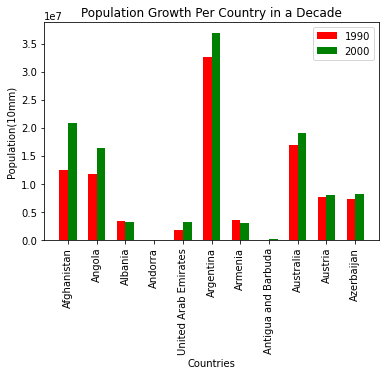

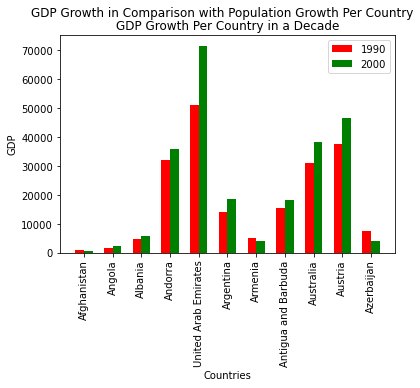

In [362]:
# plotting bar charts to show relationship

countries = focus_gdpop_df.index[0:11]
N = len(countries)
ind = np.arange(N) 
width = 0.3


# Plot1: Population parameters
fig, ax1 = plt.subplots()

pop90 = focus_gdpop_df['1990_pop'][0:11]
bar1 = ax1.bar(ind, pop90, width, color = 'r')
  
pop00 = focus_gdpop_df['2000_pop'][0:11]
bar2 = ax1.bar(ind+width, pop00, width, color='g')
   
ax1.set_xlabel("Countries")
ax1.set_ylabel('Population(10mm)')
ax1.set_title("Population Growth Per Country in a Decade")
  
ax1.set_xticks(ind+np.array((width/2)), countries, rotation=90)
ax1.legend( (bar1, bar2), ('1990','2000') )


# Plot 2: GDP parameters
fig, ax2 = plt.subplots()

gdp90 = focus_gdpop_df['1990_gdp'][0:11]
bar1 = ax2.bar(ind, gdp90, width, color = 'r')
  
gdp00 = focus_gdpop_df['2000_gdp'][0:11]
bar2 = ax2.bar(ind+width, gdp00, width, color='g')
   
ax2.set_xlabel("Countries")
ax2.set_ylabel('GDP')
ax2.set_title("GDP Growth Per Country in a Decade")
  
ax2.set_xticks(ind+np.array((width/2)), countries, rotation=90)
ax2.legend( (bar1, bar2), ('1990','2000') )

plt.suptitle('GDP Growth in Comparison with Population Growth Per Country')
plt.show()

### Research Question 2 : What is the Relationship Between GDP Growth and Life Expectancy in 1990 to 2000?

> I observed that life expectancy and GDP grew in the time period for most of our sample countries with a few exceptions. Again, this emphasizes the mulitplicy of other external factors that can affect both parameters

In [742]:
focus_gdplife_df = focus_gdplife_df.iloc[0:11,:]
focus_gdplife_df

,1990_gdp,2000_gdp,1990_lifexp,2000_lifexp
country,,,,
Afghanistan,1120,584,53.8,54.7
Angola,1610,2340,49.7,52.8
Albania,4830,5890,72.8,75.4
Andorra,32200,35800,79.0,80.8
United Arab Emirates,51300,71600,68.7,69.1
Argentina,14100,18600,72.5,74.2
Armenia,5180,4050,70.6,72.4
Antigua and Barbuda,15500,18300,74.0,74.8
Australia,31000,38200,77.0,79.7


> I plotted 4 line graphs for 4 sample countries that showed interesting correlations of our parameters. For Afghanistan, there was an inverse relationship: life expectancy improved while GDP declined. Angola and UAE show a positive correlation between GDP and life expectancy as do most other countries. Interestingly, Azerbaijan also shows a positive correlation as both GDP and life expectancy declined over the time period.

In [763]:
afgh_gdpx = focus_gdplife_df.iloc[0,:2]


In [762]:
afgh_lifexp = focus_gdplife_df.iloc[0,2:]


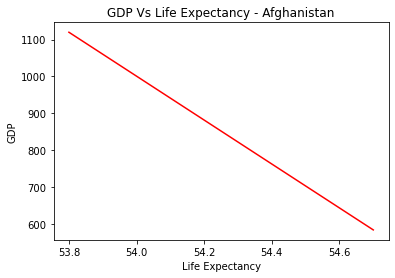

In [757]:
# Afghanistan plot

plt.plot(afgh_lifexp, afgh_gdpx, color='r', label='Afghanistan')
  
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
plt.title("GDP Vs Life Expectancy - Afghanistan")r

plt.show()

In [761]:
ang_gdpx = focus_gdplife_df.iloc[1,:2]
ang_lifexp = focus_gdplife_df.iloc[1,2:]

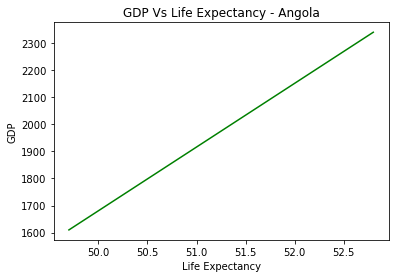

In [759]:
# Angola plot

plt.plot(ang_lifexp, ang_gdpx, color='g', label='Angola')
 
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
plt.title("GDP Vs Life Expectancy - Angola")

plt.show()

In [755]:
uae_gdpx = focus_gdplife_df.iloc[4,:2]
uae_lifexp = focus_gdplife_df.iloc[4,2:]

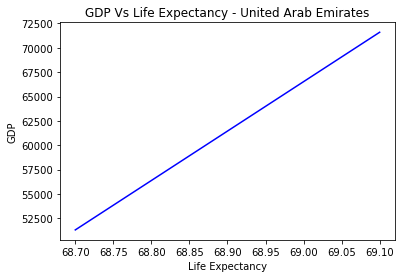

In [772]:
# UAE plot

plt.plot(uae_lifexp, uae_gdpx, color='b', label='UAE')
 
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
plt.title("GDP Vs Life Expectancy - United Arab Emirates")
  
plt.show()

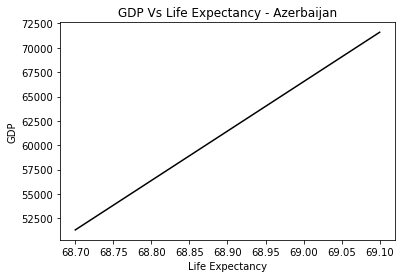

In [773]:
#Azerbaijan plot

azerb_gdpx = focus_gdplife_df.iloc[10,:2]
azerb_lifexp = focus_gdplife_df.iloc[10,2:]

plt.plot(uae_lifexp, uae_gdpx, color='0', label='Azerbaijan')
 
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
plt.title("GDP Vs Life Expectancy - Azerbaijan")
  
plt.show()

### Research Question 3 : What is the Relationship Between GDP Growth and Fertility Rate in 2000 to 2010?

> I first bring up our focused data frame featuring both parameters, then a scatter plot is created to show the relationship between the parameters

In [768]:
focus_gdpfert_df


,2000_gdp,2001_gdp,2002_gdp,2003_gdp,2004_gdp,2005_gdp,2006_gdp,2007_gdp,2008_gdp,2009_gdp,...,2001_fert,2002_fert,2003_fert,2004_fert,2005_fert,2006_fert,2007_fert,2008_fert,2009_fert,2010_fert
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,584,569,1190,1240,1200,1290,1320,1460,1480,1760,...,7.39,7.27,7.14,6.99,6.83,6.65,6.46,6.25,6.04,5.82
Angola,2340,2510,2930,3150,3560,4310,5610,6960,7850,7760,...,6.60,6.57,6.54,6.50,6.47,6.42,6.37,6.31,6.24,6.16
Albania,5890,6440,6750,7150,7580,8040,8570,9150,9910,10.3k,...,2.07,1.98,1.90,1.82,1.75,1.70,1.67,1.65,1.65,1.65
Andorra,35.8k,36k,36.1k,39.1k,41.1k,45k,48.4k,49.2k,46.9k,47.2k,...,1.46,1.42,1.29,1.31,1.30,1.30,1.31,1.32,1.33,1.34
United Arab Emirates,71.6k,72.2k,73.5k,78.6k,82.5k,80.8k,86.4k,76.6k,68.8k,58.4k,...,2.53,2.43,2.33,2.24,2.15,2.07,2.01,1.95,1.90,1.87
Argentina,18.6k,17.6k,15.5k,16.7k,18k,19.4k,20.8k,22.4k,23.1k,21.5k,...,2.54,2.52,2.50,2.47,2.45,2.43,2.41,2.40,2.38,2.37
Armenia,4050,4460,5080,5820,6470,7420,8460,9710,10.5k,9050,...,1.20,1.20,1.40,1.40,1.40,1.30,1.40,1.40,1.60,1.55
Antigua and Barbuda,18.3k,17.2k,17.1k,18k,18.7k,19.7k,21.8k,23.5k,23.1k,20k,...,2.31,2.29,2.27,2.25,2.22,2.20,2.18,2.16,2.15,2.13
Australia,38.2k,38.5k,39.5k,40.3k,41.5k,42.2k,42.7k,44.1k,44.7k,44.6k,...,1.76,1.78,1.79,1.82,1.86,1.89,1.92,1.94,1.94,1.93


> Here, I observed a negative correlation when we used our 2 sample countries to explore a relationship between GDP and fertility rate. The negative correlation can be seen in most countries in our datasets. This connotes however, that there may actually be NO relationship between the parameters. One might expect fertility rate to increase as a country improves its GDP, but in modern times (as shown in our data), fertility rate has declined in most countries as a trend. Most modern families simply do not have a lot of children as compared to earlier years, the 1800s for instance. And this seems to be a trend independent of GDP growth.

In [715]:
afgh_fert = focus_gdpfert_df.iloc[0,11:22].astype('float')


In [714]:
afgh_gdp = focus_gdpfert_df.iloc[0,:11].astype('float')


In [717]:
ang_fert = focus_gdpfert_df.iloc[1,11:22].astype('float')
 

In [716]:
ang_gdp = focus_gdpfert_df.iloc[1,:11].astype('float')
 

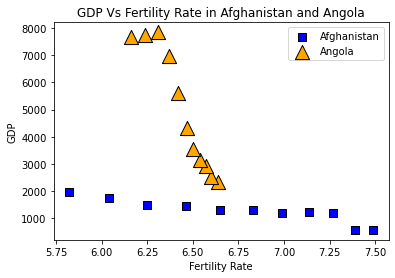

In [731]:
# Scatter diagram plot

# Afghanistan data

x1 = afgh_fert
y1 = afgh_gdp
 
# Angola data
x2 = ang_fert
y2 = ang_gdp
 
plt.scatter(x1, y1, c ="blue", marker ="s",edgecolor ="black",s = 50, label = 'Afghanistan') 
plt.scatter(x2, y2, c ="orange", marker ="^", edgecolor ="black", s = 200, label = 'Angola')
 
plt.xlabel("Fertility Rate")
plt.ylabel("GDP")
plt.legend()
plt.title('GDP Vs Fertility Rate in Afghanistan and Angola')
plt.show()

## Single Variable Analysis of Key Parameters: GDP, Population, Life Expectancy, Fertility Rate

> With regards this GDP data analysis, the key parameters are obtained from other data sets via merging with the GDP data set

In [774]:
# For a deeper understanding of the parameters, an analysis will be done on each parameter using our data of focus

# 1 - GDP: using useful dataframe gdpuse_df

gdpuse_df.head(10)


,1990_gdp,1991_gdp,1992_gdp,1993_gdp,1994_gdp,1995_gdp,1996_gdp,1997_gdp,1998_gdp,1999_gdp,2000_gdp
country,,,,,,,,,,,
Afghanistan,1120,1020,981,672,498,736,698,663,634,603,584
Angola,1610,1670,1620,1260,1300,1530,1780,1960,2110,2210,2340
Albania,4830,3500,3270,3600,3920,4470,4910,4400,4820,5480,5890
Andorra,32.2k,31.7k,30.8k,29.4k,29.3k,29.6k,30.8k,33.7k,34.9k,36.2k,35.8k
United Arab Emirates,51.3k,50.5k,50.5k,50.1k,53.1k,56.2k,58.6k,62.8k,62.8k,64.6k,71.6k
Argentina,14.1k,15.2k,16.2k,17.3k,18.1k,17.4k,18.1k,19.3k,19.9k,19k,18.6k
Armenia,5180,4620,2740,2550,2760,3010,3230,3380,3650,3800,4050
Antigua and Barbuda,15.5k,15.6k,15.5k,16k,16.7k,15.6k,16.3k,16.8k,17.3k,17.6k,18.3k
Australia,31k,30.5k,30.3k,31.2k,32.1k,32.9k,33.7k,34.7k,35.9k,37.2k,38.2k


In [776]:
# cleaning useful GDP dataframe by removing the suffixes k and M and formatting type to int

gdpuse_df['1990_gdp']=gdpuse_df.iloc[:,0].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
gdpuse_df['1991_gdp']=gdpuse_df.iloc[:,1].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
gdpuse_df['1992_gdp']=gdpuse_df.iloc[:,2].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
gdpuse_df['1993_gdp']=gdpuse_df.iloc[:,3].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
gdpuse_df['1994_gdp']=gdpuse_df.iloc[:,4].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
gdpuse_df['1995_gdp']=gdpuse_df.iloc[:,5].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
gdpuse_df['1996_gdp']=gdpuse_df.iloc[:,6].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
gdpuse_df['1997_gdp']=gdpuse_df.iloc[:,7].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
gdpuse_df['1998_gdp']=gdpuse_df.iloc[:,8].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
gdpuse_df['1999_gdp']=gdpuse_df.iloc[:,9].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
gdpuse_df['2000_gdp']=gdpuse_df.iloc[:,10].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [788]:
# the average of the GDP for each year across our sample countries

mean_gdpuse = gdpuse_df.mean()
mean_gdpuse

1990_gdp    12764.133333
1991_gdp    12589.200000
1992_gdp    12588.702564
1993_gdp    12651.364103
1994_gdp    12908.241026
1995_gdp    13224.497436
1996_gdp    13574.215385
1997_gdp    14069.928205
1998_gdp    14365.764103
1999_gdp    14671.548718
2000_gdp    15201.589744
dtype: float64

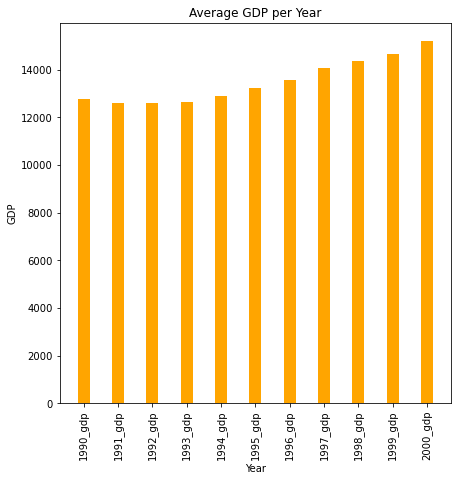

count       11.000000
mean     13509.925874
std        932.443377
min      12588.702564
25%      12707.748718
50%      13224.497436
75%      14217.846154
max      15201.589744
dtype: float64

In [865]:
# bar chart is plotted depicting the mean GDP each year

year = mean_gdpuse.index
avg_gdp = mean_gdpuse

plt.figure(figsize = (7, 7))
plt.bar(year, avg_gdp, color='orange', width=0.35)

plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Average GDP per Year")
plt.show()

mean_gdpuse.describe()

In [837]:
# 2 - Population: using useful dataframe popuse_df

popuse_df.head(10) 

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
country,,,,,,,,,,,
Afghanistan,12.4M,13.3M,14.5M,15.8M,17.1M,18.1M,18.9M,19.4M,19.7M,20.2M,20.8M
Angola,11.8M,12.2M,12.7M,13.1M,13.5M,13.9M,14.4M,14.9M,15.4M,15.9M,16.4M
Albania,3.29M,3.28M,3.25M,3.2M,3.15M,3.11M,3.1M,3.1M,3.11M,3.12M,3.13M
Andorra,54.5k,56.7k,58.9k,61k,62.7k,63.9k,64.4k,64.3k,64.1k,64.4k,65.4k
United Arab Emirates,1.83M,1.94M,2.05M,2.17M,2.29M,2.42M,2.54M,2.67M,2.81M,2.97M,3.13M
Argentina,32.6M,33.1M,33.5M,34M,34.4M,34.8M,35.2M,35.7M,36.1M,36.5M,36.9M
Armenia,3.54M,3.51M,3.44M,3.36M,3.28M,3.22M,3.17M,3.13M,3.11M,3.09M,3.07M
Antigua and Barbuda,62.5k,63.4k,64.5k,65.8k,67.2k,68.7k,70.2k,71.7k,73.2k,74.7k,76k
Australia,17M,17.2M,17.4M,17.6M,17.8M,18M,18.2M,18.4M,18.6M,18.8M,19M


In [838]:
# cleaning useful Population dataframe by removing the suffixes k, M and B and formatting type to int

popuse_df['1990_pop']=popuse_df.iloc[:,0].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)
popuse_df['1991_pop']=popuse_df.iloc[:,1].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)
popuse_df['1992_pop']=popuse_df.iloc[:,2].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)
popuse_df['1993_pop']=popuse_df.iloc[:,3].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)
popuse_df['1994_pop']=popuse_df.iloc[:,4].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)
popuse_df['1995_pop']=popuse_df.iloc[:,5].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)
popuse_df['1996_pop']=popuse_df.iloc[:,6].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)
popuse_df['1997_pop']=popuse_df.iloc[:,7].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)
popuse_df['1998_pop']=popuse_df.iloc[:,8].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)
popuse_df['1999_pop']=popuse_df.iloc[:,9].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)
popuse_df['2000_pop']=popuse_df.iloc[:,10].replace({"k":"*1e3", "M":"*1e6", "B":"1e9"}, regex=True).map(pd.eval).astype(int)

In [859]:
# We use 10 sample countries in this case

tenpopuse = popuse_df.iloc[0:10,:]

In [860]:
# the average of the Population for each year across our sample countries

mean_popuse = tenpopuse.mean()
mean_popuse

C:\Users\IKENNA\AppData\Local\Temp\ipykernel_6424\1002940972.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_popuse = tenpopuse.mean()


1990_pop     9029700.0
1991_pop     9242010.0
1992_pop     9479339.9
1993_pop     9724680.0
1994_pop     9959990.0
1995_pop    10167260.0
1996_pop    10366460.0
1997_pop    10546599.9
1998_pop    10700729.8
1999_pop    10876910.0
2000_pop    11064139.9
dtype: float64

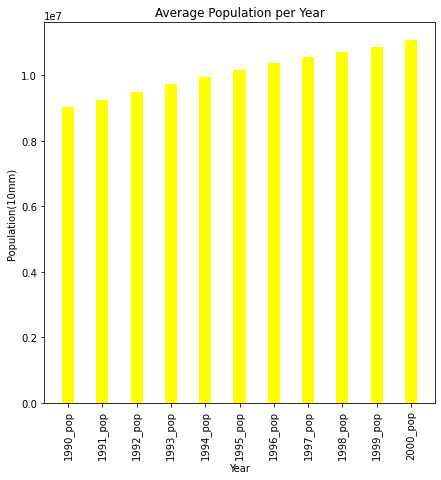

count    1.100000e+01
mean     1.010526e+07
std      6.779439e+05
min      9.029700e+06
25%      9.602010e+06
50%      1.016726e+07
75%      1.062366e+07
max      1.106414e+07
dtype: float64

In [864]:
# bar chart is plotted depicting the mean Population each year

year = mean_popuse.index
avg_pop = mean_popuse

plt.figure(figsize = (7, 7))
plt.bar(year, avg_pop, color='yellow', width=0.35)

plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Population(10mm)")
plt.title("Average Population per Year")
plt.show()

mean_popuse.describe()

In [846]:
# 3 - Life Expectancy: using useful dataframe lifexpuse_df
#     following all the procedures of the previous parameters

lifexpuse_df.head(10)

,1990_lifexp,1991_lifexp,1992_lifexp,1993_lifexp,1994_lifexp,1995_lifexp,1996_lifexp,1997_lifexp,1998_lifexp,1999_lifexp,2000_lifexp
country,,,,,,,,,,,
Afghanistan,53.8,53.8,54.2,54.4,53.9,54.3,54.7,54.5,53.3,54.7,54.7
Angola,49.7,50.3,50.3,49.0,50.3,51.2,51.7,51.6,50.6,51.9,52.8
Albania,72.8,72.6,73.2,73.8,74.6,74.6,74.5,72.9,74.8,75.1,75.4
Andorra,79.0,79.1,79.2,79.3,79.5,79.8,80.0,80.2,80.4,80.6,80.8
United Arab Emirates,68.7,68.7,68.8,68.8,68.7,68.8,68.9,69.0,69.2,69.2,69.1
Argentina,72.5,72.7,72.8,73.0,73.4,73.4,73.5,73.6,73.7,73.8,74.2
Armenia,70.6,70.3,69.4,69.0,69.5,70.1,70.4,71.1,71.6,71.9,72.4
Antigua and Barbuda,74.0,74.0,74.0,73.4,73.3,73.3,74.0,73.5,74.5,74.7,74.8
Australia,77.0,77.4,77.6,77.9,78.0,78.3,78.5,78.8,79.1,79.4,79.7


In [849]:
mean_lifexpuse = lifexpuse_df.mean()

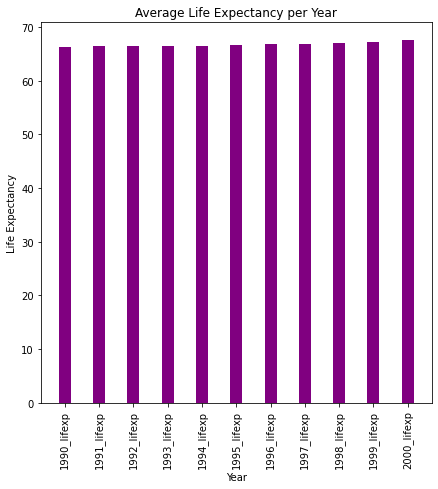

count    11.000000
mean     66.729324
std       0.379143
min      66.296923
25%      66.449487
50%      66.590769
75%      66.958205
max      67.489231
dtype: float64

In [862]:
year = mean_lifexpuse.index
avg_lifexp = mean_lifexpuse

plt.figure(figsize = (7, 7))
plt.bar(year, avg_lifexp, color='purple', width=0.35)

plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Average Life Expectancy per Year")
plt.show()

mean_lifexpuse.describe()

In [851]:
# 4 - Fertility Rate: using useful dataframe clntotfert_df. 
#     I use this cleaned df because we had to drop 2 rows and include 1 new row as mentioned earlier in the project
#     following all the procedures of the previous parameters

clntotfert_df.head(10)

,2000_fert,2001_fert,2002_fert,2003_fert,2004_fert,2005_fert,2006_fert,2007_fert,2008_fert,2009_fert,2010_fert
country,,,,,,,,,,,
Afghanistan,7.49,7.39,7.27,7.14,6.99,6.83,6.65,6.46,6.25,6.04,5.82
Angola,6.64,6.60,6.57,6.54,6.50,6.47,6.42,6.37,6.31,6.24,6.16
Albania,2.16,2.07,1.98,1.90,1.82,1.75,1.70,1.67,1.65,1.65,1.65
United Arab Emirates,2.64,2.53,2.43,2.33,2.24,2.15,2.07,2.01,1.95,1.90,1.87
Andorra,1.37,1.46,1.42,1.29,1.31,1.30,1.30,1.31,1.32,1.33,1.34
Argentina,2.56,2.54,2.52,2.50,2.47,2.45,2.43,2.41,2.40,2.38,2.37
Armenia,1.30,1.20,1.20,1.40,1.40,1.40,1.30,1.40,1.40,1.60,1.55
Antigua and Barbuda,2.32,2.31,2.29,2.27,2.25,2.22,2.20,2.18,2.16,2.15,2.13
Australia,1.76,1.76,1.78,1.79,1.82,1.86,1.89,1.92,1.94,1.94,1.93


In [852]:
mean_clntotfert = clntotfert_df.mean()

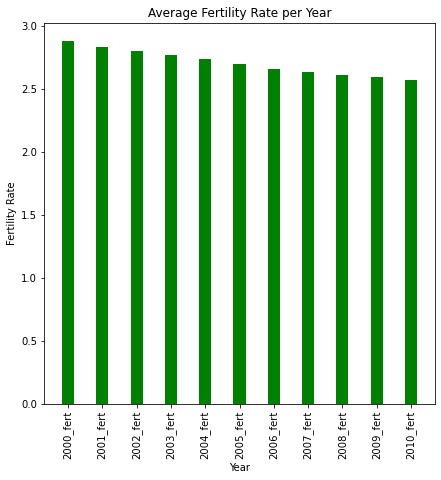

count    11.000000
mean      2.704380
std       0.103903
min       2.565455
25%       2.618636
50%       2.696364
75%       2.780455
max       2.876364
dtype: float64

In [863]:
year = mean_clntotfert.index
avg_clntotfert = mean_clntotfert

plt.figure(figsize = (7, 7))
plt.bar(year, avg_clntotfert, color='green', width=0.35)

plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.title("Average Fertility Rate per Year")
plt.show()

mean_clntotfert.describe()

> From the single parameter analysis, we observe that each of the first 3 parameters trend up year to year from 1990 to 2000. We acknowledge however that this does not necessarily imply the GDP growth is 100% dependent on the population and life expectancy growth : other external factors are most likely involved to varying degrees.

> The fertility rate chart is interesting as it is the only one that depicts a downward trend from years 2000 to 2010. It clearly shows minimal to no correlation with GDP and corresponds to the trend in modern times of families having fewer children by choice.

<a id='conclusions'></a>
## Conclusions

> In my exploratory analysis and from my research, GDP is affected by a multiplicity of factors and while some relationships were drawn statistically and visually amonngst the parameters and GDP, this does not necessarily imply causation.

> I observed that while most countries grow in GDP and population between 1990 and 2000, there were a few exceptions, which highlight the fact that GDP growth may not be exclusively dependent on population and that other economic and social factors like war and civil unrest can affect a country's GDP.

> I observed that life expectancy and GDP grew between 1990 and 2000 for most of our sample countries with a few exceptions. Again, this emphasizes the mulitplicy of other external factors that can affect both parameters. Life expectancy, however, does show a strong relationship with GDP.

> Furthermore, I observed a negative correlation when we used our 2 sample countries to explore a relationship between GDP and fertility rate. The negative correlation can be seen in most countries in our datasets. This is the strongest parameter showing correlation does not imply causation.